# Aufgabe 2:
**(a)** <br><br>
$$\theta \rarr 0\quad \text{bzw.}\quad\theta \in (1\cdot10^{-9},1\cdot10^{-7}) \quad \text{(s. Plot)}$$ 
<br><br>
**(b)**  <br>
$$f = \frac{2 \gamma^2 + \gamma^2 \sin^2\theta}{1 + \gamma^2 \beta^2 \sin^2\theta}$$

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
E = 50 * 10 **9
m = 511 * 10**3
gamma = E/m
beta = np.sqrt(1-gamma**(-2))

**(c)**

In [4]:
def function_unstable(theta):
    return (2 + np.sin(theta)**2) / (1 - beta**2 * np.cos(theta)**2)

def function_stable(theta):
    return (2 * gamma**2 + gamma**2 * np.sin(theta)**2 ) / (1 + gamma**2 * beta**2 * np.sin(theta)**2)

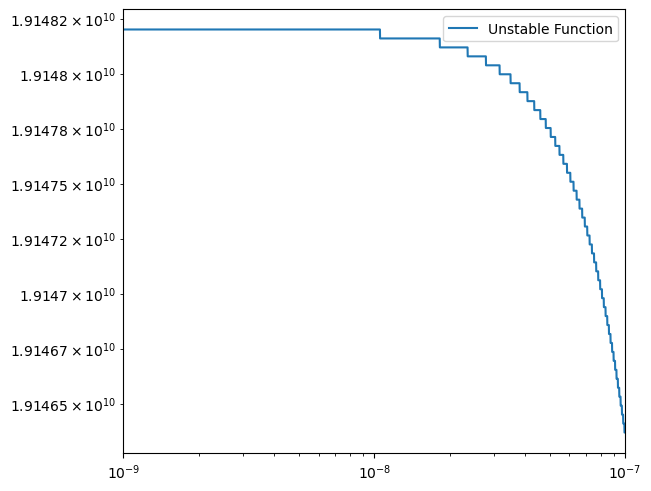

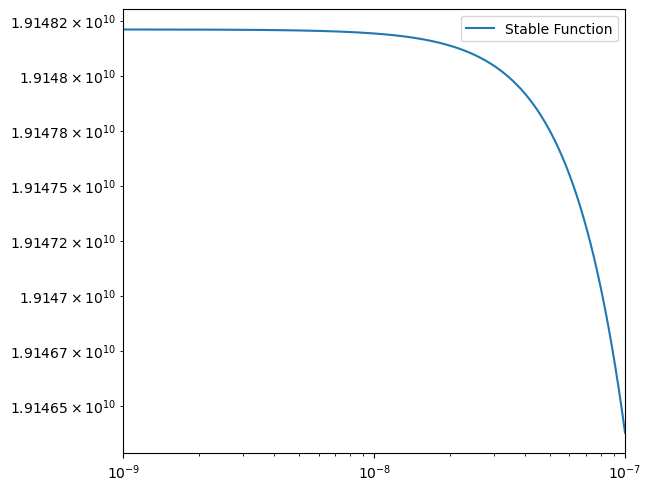

In [5]:
x = np.logspace(-9,-7, 10000)

fig1, (ax1) = plt.subplots(1, 1, layout="constrained")
ax1.plot(x, function_unstable(x), label="Unstable Function")
ax1.set_xscale("log")
ax1.set_yscale("log")
plt.xlim(1e-9,1e-7)
ax1.legend(loc="best")

fig2, ax2 = plt.subplots(1, 1, layout="constrained")
ax2.plot(x, function_stable(x), label="Stable Function")
ax2.set_xscale("log")
ax2.set_yscale("log")
plt.xlim(1e-9,1e-7)
ax2.legend(loc="best")


**(d)** <br>
In General: Condition Nummer $K = \left|x \frac{f'(x)}{f(x)}\right|$
<br><br> Here: <br>
$$\frac{\text{d}}{\text{d}\theta} f(E,\theta) = - \frac{2\cos\theta\sin\theta\big( \beta^2\sin^2\theta + \beta^2 \cos^2\theta +2\beta ^2 -1 \big)}{\big(\beta^2 \cos^2(\theta)-1 \big)^2}$$
$$= - \frac{2\cos\theta\sin\theta\big(3\beta ^2 -1 \big)}{\big(\beta^2 \cos^2(\theta)-1 \big)^2}$$
<br><br>
$$\Rarr K = \left| -\theta \cdot  \frac{2\cos\theta\sin\theta\big(3\beta ^2 -1 \big)}{\big(\beta^2 \cos^2(\theta)-1 \big)^2} \cdot \frac{1-\beta^2\cos^2\theta}{2+\sin^2\theta}\right|$$

**(e)**

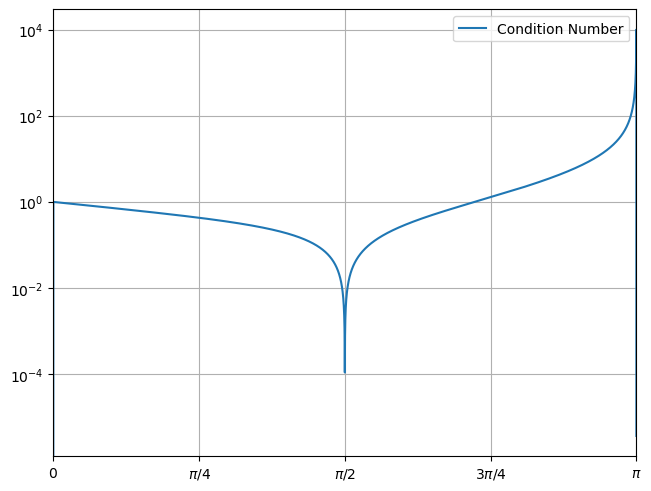

In [21]:
def condition_number(x):
    return np.abs(-x * (2 * np.cos(x) * np.sin(x)*(3 * beta**2 -1)* (1 - beta**2 * np.cos(x)**2))/((beta**2 * np.cos(x)**2 - 1)**2 *(2 + np.sin(x))**2))

x2 = np.linspace(0, np.pi, 10000)
# x2 = np.linspace(-np.pi, 2*np.pi, 10000)
labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
fig3, ax3 = plt.subplots(1, 1, layout="constrained")
ax3.plot(x2, condition_number(x2), label="Condition Number")
ax3.set_xticks(np.arange(0, np.pi+0.01, np.pi/4))
ax3.set_xticklabels(labels)
ax3.set_yscale("log")
ax3.grid()
plt.xlim(0 ,np.pi)
ax3.legend(loc="best")

$\Rarr$ ill-conditioned for $\theta = \pi$

**(f)**<br>
Stability bezieht sich auf den Algorithmus und Condition bezieht sich auf das (mathematische) Problem. "Stablity" beschreibt, inwiefern der Algorithmus kleine Fehler im Ergebnis hat, wenn man kleine Fehler übergibt. "Instabilities" lassen sich umgehen, indem den Algorithmus umgeschrieben wird, wie in Aufgabenteil 2b. Z.B. kann es zu Rundungsfehlern kommen, weil man sich einer Polstelle nähert, wie in 2a-c.<br>
"Condition" beschreibt wie Fehlerbehaftet das Problem selber bei kleinen Veränderung der Übergabe ist. Die Condition lässt sich allerdings nicht durch Umschreiben des Algorithmus lösen. Z.B. ist ein Problem "well-conditioned", wenn bei einer kleinen Veränderung der Übergabe, sich das Ergbenis nur minimal ändert und "ill-conditioned", wenn bei einer kleinen Veränderung der Übergabe, sich das Ergebnis startk verändert.